In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# %matplotlib inline

In [2]:
def ScatterPlot(X, Y, assignments=None, centers=None):
    if assignments is None:
        assignments = [0] * len(X)
    
    fig = plt.figure(figsize=(14,8))
    cmap = ListedColormap(['red', 'green', 'blue', 'magenta'])
    plt.scatter(X, Y, c=assignments, cmap=cmap)
    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], c=range(len(centers)), marker='+', s=400, cmap=cmap)  
    plt.xlabel('Height (in)')
    plt.ylabel('Weight (lbs)')
    plt.show()

### Data

Weight and height data obtained from [SOCR Data Dinov 020108 HeightsWeights](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

   Height  Weight
0   65.78  112.99
1   71.52  136.49
2   69.40  153.03
3   68.22  142.34
4   67.79  144.30


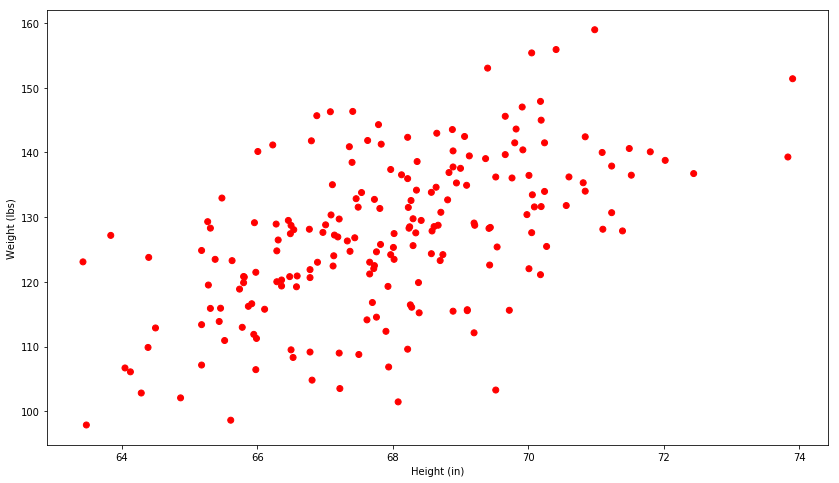

In [3]:
hw_frame = pd.read_csv('hw-data.txt', delim_whitespace=True,
  header=None, names=['Index', 'Height', 'Weight'])
hw_frame.drop('Index', 1, inplace=True)
print(hw_frame.head(5))
  
ScatterPlot(hw_frame.Height, hw_frame.Weight)

In [4]:
def input_fn():
    return tf.constant(hw_frame.values, tf.float32, hw_frame.shape), None

In [5]:
tf.logging.set_verbosity(tf.logging.ERROR)
kmeans = tf.contrib.learn.KMeansClustering(num_clusters=5, relative_tolerance=0.0001)
_ = kmeans.fit(input_fn=input_fn)

In [6]:
clusters = kmeans.clusters()
assignments = list(kmeans.predict_cluster_idx(input_fn=input_fn))

<IPython.core.display.Javascript object>


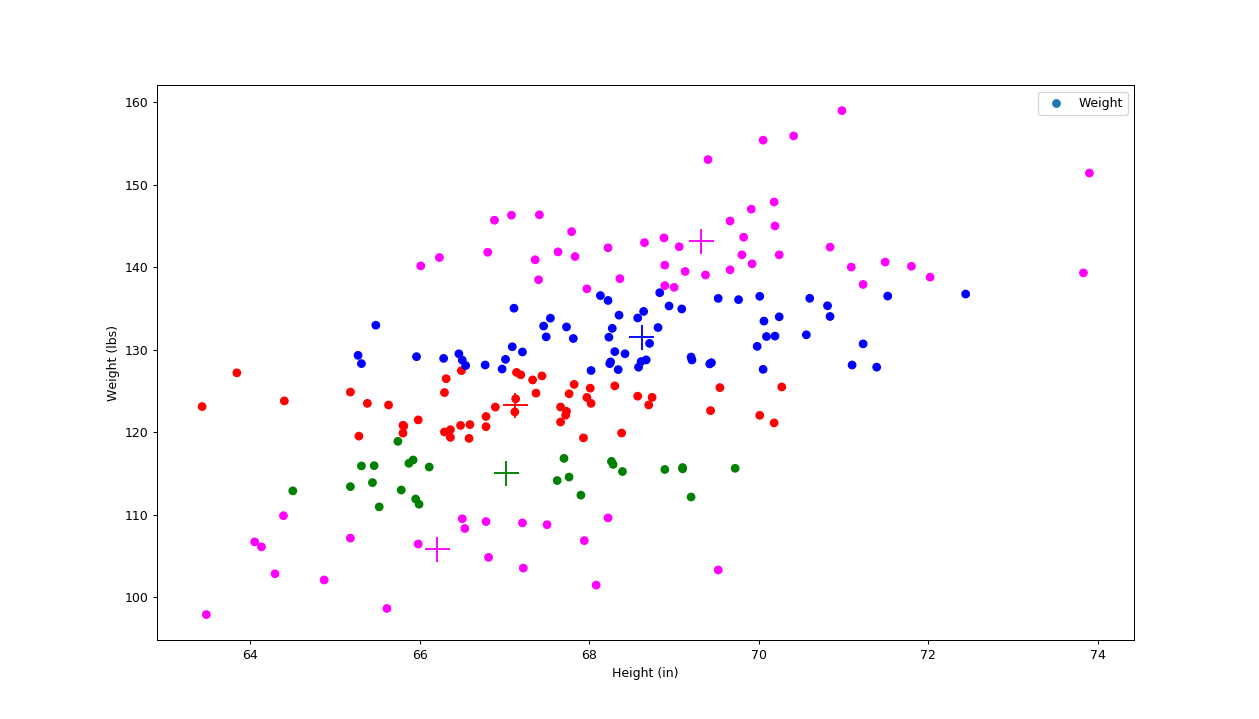

In [11]:
ScatterPlot(hw_frame.Height, hw_frame.Weight, assignments, clusters)
plt.legend()

/home/ubuntu/.local/lib/python3.5/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>


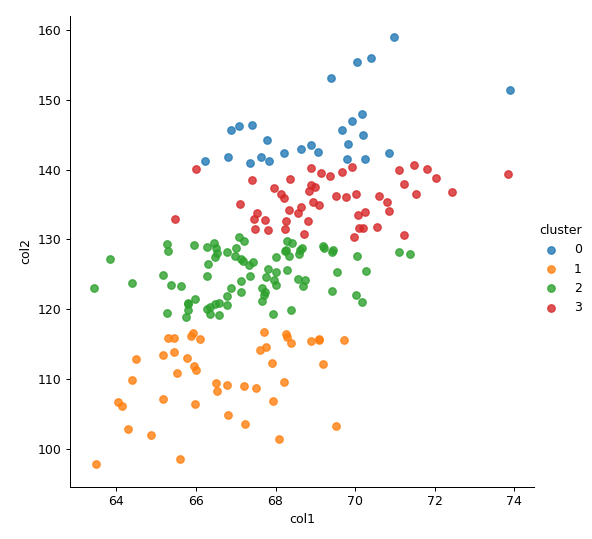

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

#uncomment below if using Jupyter
#%config InlineBackend.figure_format = 'retina'

# get data
df = pd.read_csv('dualcolumn.csv')

def k_means_clustering(col1, col2, clusters, steps=100):
    '''
    Takes in two dataframe columns and outputs plot of clusters.
    '''
    vec_vals = []
    for i in range(len(col1)):
        a = col1[i]
        b = col2[i]
        vec_vals.append([a, b])
    v_vals = np.array(vec_vals)
    np.random.shuffle(v_vals)    
    
    sess = tf.Session()
    k = clusters
    points = v_vals
    data = tf.constant(points)
    
    # random initial centroids (points shuffled above)
    centroids = tf.Variable(data[:k, :])

    # add k dim to data and n dim to centroids to make matrices compatible
    # for array operations instead of loops
    data_expanded = tf.expand_dims(data, 0)
    centroids_expanded = tf.expand_dims(centroids, 1)

    # computes squared Euclidean distance between every point and every centroid
    # and get closest centroid for each point
    allocations = tf.argmin(tf.reduce_sum(tf.square(data_expanded - centroids_expanded), 2), 0)

    sess.run(tf.global_variables_initializer())
    c = 0 # index of centroid
    tf.equal(allocations, c)
    tf.gather(data, tf.where(tf.equal(allocations, c)))

    means = tf.concat(
        [tf.reduce_mean(
            tf.gather(data,
                      tf.where(tf.equal(allocations, c))), 0) for c in range(k)], 0)

    update_centroids = tf.assign(centroids, means)

    for step in range(steps):
        _, centroid_values, allocation_values = sess.run([update_centroids, centroids, allocations])
        
    clusters_df = pd.DataFrame({col1.name: points[:,0], col2.name: points[:,1], "cluster": allocation_values})
    sns.lmplot(col1.name, col2.name, data=clusters_df, fit_reg=False, size=6, hue="cluster")
    plt.show()
    
    
k_means_clustering(df['col1'], df['col2'], 4)